# Overview
- Apply logistic regression, decision tree, and random forest on [Balloons dataset](https://archive.ics.uci.edu/ml/datasets/balloons)
- Extract feature importance
- Evaluate the classification accuracy of the models

## Load data
1. Read the dataset [documentation](https://archive.ics.uci.edu/ml/datasets/balloons)
2. Load the [yellow-small+adult-stretch dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/yellow-small+adult-stretch.data) of Balloons data
2. Specify the name of the columns
3. Get the feature vector (X) and target vector (y)

In [1]:
import pandas as pd

In [14]:
# Load the yellow-small+adult-stretch dataset of Balloons data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/yellow-small+adult-stretch.data', header=None)

# Learn more about data
print(df.head())
print(df.columns)
print(df.shape) # dimension

        0      1        2      3  4
0  YELLOW  SMALL  STRETCH  ADULT  T
1  YELLOW  SMALL  STRETCH  CHILD  T
2  YELLOW  SMALL      DIP  ADULT  T
3  YELLOW  SMALL      DIP  CHILD  T
4  YELLOW  LARGE  STRETCH  ADULT  T
Int64Index([0, 1, 2, 3, 4], dtype='int64')
(16, 5)


In [16]:
# Specify the name of the columns
df.columns = ['color', 'size', 'act', 'age', 'inflated']

# Learn more about data
print(df.info())
print(df.describe())

# Check label colomn
print(df['inflated'].value_counts(dropna = False))
print(df.inflated.value_counts(dropna = False).head())

# Show the header and the data
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
color       16 non-null object
size        16 non-null object
act         16 non-null object
age         16 non-null object
inflated    16 non-null object
dtypes: object(5)
memory usage: 720.0+ bytes
None
         color   size      act    age inflated
count       16     16       16     16       16
unique       2      2        2      2        2
top     YELLOW  SMALL  STRETCH  CHILD        F
freq         8      8        8      8        9
F    9
T    7
Name: inflated, dtype: int64
F    9
T    7
Name: inflated, dtype: int64


,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,T
4,YELLOW,LARGE,STRETCH,ADULT,T
5,YELLOW,LARGE,STRETCH,CHILD,F
6,YELLOW,LARGE,DIP,ADULT,F
7,YELLOW,LARGE,DIP,CHILD,F
8,PURPLE,SMALL,STRETCH,ADULT,T
9,PURPLE,SMALL,STRETCH,CHILD,F


In [19]:
# Specify the name of the target
target = 'inflated'

# Get the target vector
y = df[target]

# Specify the name of the features
features = list(df.drop(target, axis=1).columns)

# Get the feature vector
X = df[features]

## Preprocess data
1. Encode the features and target 
2. Randomly choose 30% of the data for testing
    - hint: set random_state=0 and stratify=y (in order to obtain the same result)

In [20]:
# Encode the features using one-hot-encoding
X = pd.get_dummies(X)

# Show the encoded features
X

,color_PURPLE,color_YELLOW,size_LARGE,size_SMALL,act_DIP,act_STRETCH,age_ADULT,age_CHILD
0,0,1,0,1,0,1,1,0
1,0,1,0,1,0,1,0,1
2,0,1,0,1,1,0,1,0
3,0,1,0,1,1,0,0,1
4,0,1,1,0,0,1,1,0
5,0,1,1,0,0,1,0,1
6,0,1,1,0,1,0,1,0
7,0,1,1,0,1,0,0,1
8,1,0,0,1,0,1,1,0
9,1,0,0,1,0,1,0,1


In [21]:
from sklearn.preprocessing import LabelEncoder

# Declare the LabelEncoder
class_le = LabelEncoder()

# Enclode the target
y = class_le.fit_transform(y)

In [22]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (set randome_state as 0 and stratify as y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Step 3:  train, test, and evaluate
1. Train and test logistic regression, decision tree, and random forest
    - for decision tree: plot the decision tree using graphviz
    - for random forest: plot the bar chart of feature importances (sorted in descending order)
    - hint: set random_state=0 for each classifier (in order to obtain the same result)
2. Evaluate the performance of the classifiers based on classification accuracy
    - plot the bar chart of accuracies (sorted in descending order)

In [23]:
from sklearn.metrics import precision_recall_fscore_support

def train_test_evaluate(classifier):
    """
    Train, test, and evaluate the classifier
    :param classifier: a classifier             
    """
    
    # Declare the model
    clf = classifier(random_state=0)
    
    # Train the model
    clf.fit(X_train, y_train)
    
    if classifier is DecisionTreeClassifier:
        global tree  
        # Get the tree
        tree = clf
    elif classifier is RandomForestClassifier:
        global importances
        # Get the feature importances
        importances = clf.feature_importances_
    
    # Update the list of accuracies
    accuracies.append(clf.score(X_test, y_test))

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# The list of classifiers
clfs = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier]

# The tree
tree = None

# The list of importances
importances = []

# The list of accuracies
accuracies = []

# For each classifer
for classifier in clfs:
    # Call function train_test_evaluate (defined above)
    train_test_evaluate(classifier)

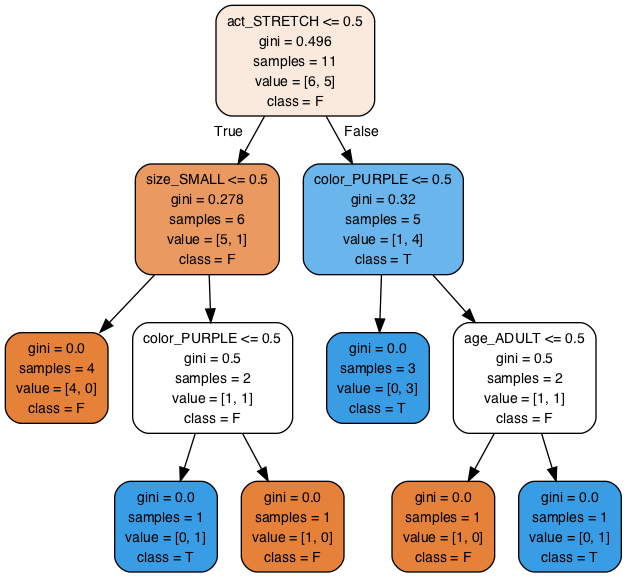

In [10]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['F', 
                                        'T'],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png()) 

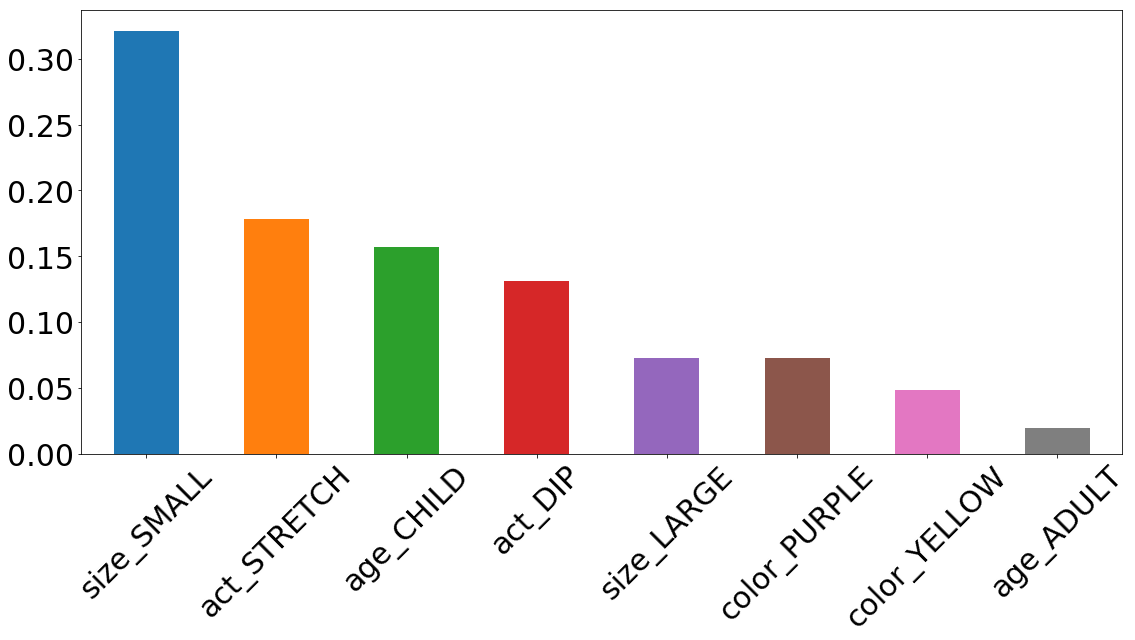

In [27]:
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

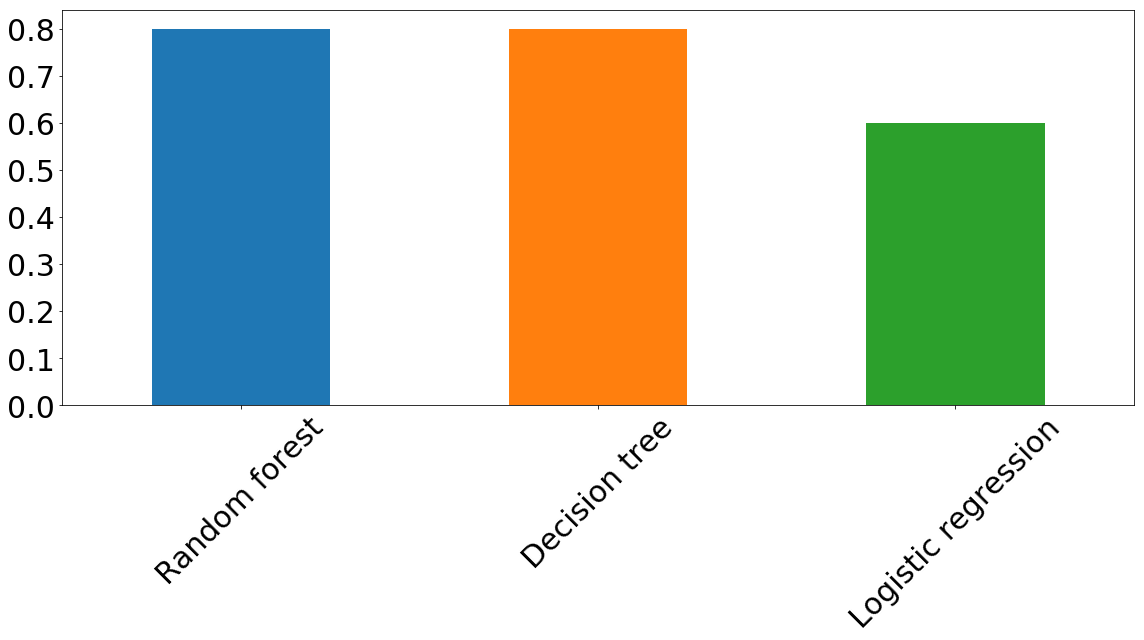

In [12]:
# Convert the accuracies into one-dimensional 1darray with corresponding classifier names as axis labels
clf_accuracies = pd.Series(accuracies, ['Logistic regression', 'Decision tree', 'Random forest'])

# Sort the array in descending order of the accuracies
clf_accuracies = clf_accuracies.sort_values(ascending=False)

# Draw the bar Plot from clf_accuracies 
clf_accuracies.plot(x='Classifiers', y='Fscores', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()